# 🧭 Testing YOLO v3 - Objects Detection Algorithm
* 코드 내용 Kaggle Notebook : https://www.kaggle.com/valentynsichkar/yolo-v3-with-opencv
* Using **'dnn'** OpenCV library for loading model of Neural Network from configuration file.
* Using weights trained on COCO dataset of 80 classes.

In [1]:
# Importing necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

# COCO class labels 로드
**COCO Dataset**
- object detection, segmentation, keypoint detection 등을 위한 데이터셋
- 구성 설명 : https://ukayzm.github.io/cocodataset/

In [2]:
labels = open('./data/coco.names').read().strip().split('\n')
labels

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [3]:
#Defining paths to the weights and configuration file with model of Neural Network
weights_path = './data/yolov3.weights'
config_path = './data/yolov3.cfg'

# 약한 예측을 제거하기 위한 최소 확률 설정
probability_minimum = 0.5

# Setting threshold for non maximum suppression - NMS를 위한 threshold 지정
threshold = 0.3

# OpenCV의 `dnn` 라이브러리를 통해 trained YOLO Object Detector 로드하기

In [4]:
network = cv2.dnn.readNetFromDarknet(config_path, weights_path)

#layers 이름 가져오기
layers_names_all = network.getLayerNames()
layers_names_all

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [5]:
#  Getting only output layers' names that we need from YOLO algorithm
layers_names_output = [layers_names_all[i-1] for i in network.getUnconnectedOutLayers()]
print(layers_names_output)

['yolo_82', 'yolo_94', 'yolo_106']


# input image 로드

In [25]:
# image_input = cv2.imread('./data/images_for_testing/cat2.jpg')
image_input = cv2.imread('./data/images_for_testing/dog.jpg')
image_input_shape = image_input.shape
image_input_shape

(576, 768, 3)

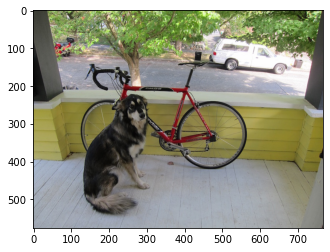

In [27]:
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))

# input image에서 blob 가져오기
- 입력 영상을 blob 객체로 만들어서 추론을 진행해야 한다.
- 하나의 영상을 추론할 때는 `cv2.dnn.blobFromImage`함수를 이용하여 1개의 블롭객체를 받고 \
  여러 개의 영상을 추론할 때는 `cv2.dnn.blobFromImages`함수로 여러 개의 블롭객체를 받아서 사용한다.
- cv2.dnn.blobFromImage(image, scalefactor=None, size=None, mean=None, swapRB=None, crop=None, ddepth=None) -> retval 
  - image : 입력 영상
  - scalefactor : 입력 영상 픽셀 값에 곱할 값. default = 1
  - size : 출력 영상의 크기. default = (0,0)
  - mean : 입력 영상 각 채널에서 뺄 평균값. default = (0,0,0,0)
  - swapRB : R과 B 채널을 서로 바꿀 것인지 여부. default = False
  - crop : crop 수행 여부. default = False
  - ddepth : 출력 블롭의 깊이. CV_32F or CV_8U. default = CV_32F
  - retval : 영상으로부터 구한 블롭 객체. numpy.ndarry. shape = (N,C,H,W) (=개수, 채널 수, height, width). dtype=numpy.float32
  
https://deep-learning-study.tistory.com/299

In [28]:
# The 'cv2.dnn.blobFromImage' function returns 4-dimensional blob
# from input image after mean subtraction, normalizing, and RB channels swapping
# Resulted shape has number of images, number of channels, width and height
# E.G.: blob = cv2.dnn.blobFromImage(image, scalefactor=1.0, size, mean, swapRB=True)
# Link: https://www.pyimagesearch.com/2017/11/06/deep-learning-opencvs-blobfromimage-works/
blob = cv2.dnn.blobFromImage(image_input, 1/255.0, (416,416), swapRB=True, crop=False)
print(image_input_shape)
print(blob.shape)

(576, 768, 3)
(1, 3, 416, 416)


(416, 416, 3)


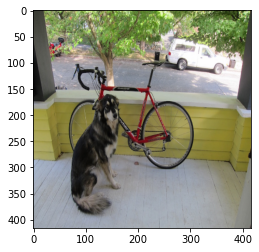

In [29]:
# Check point
# Slicing blob and transposing to make channels come at the end
blob_to_show = blob[0, :, :, :].transpose(1,2,0)
print(blob_to_show.shape)

plt.imshow(blob_to_show)

# BLOB와 출력 레이어를 통해서만 forward pass 구현
Implementing forward pass with our blob and only through output layers
- readNet으로 만든 객체에 `.setInput` 함수로 네트워크에 입력을 설정할 수 있다.
- cv2.dnn_Net.setInput(blob, name=None, scalefactor=None, mean=None) -> None
  - blob : 블롭객체
  - name : 입력 레이어 이름 (보통 skip 한다)
  - scalefactor, mean : blob 생성할 때 지정해주었으므로 기본값을 사용
- `v2.dnn_Net.forward`으로 네트워크 순방향 실행할 수 있다. (추론) 네트워크를 어떻게 생성했냐에 따라 출력을 여러 개 지정할 수 있다.(outputNames)
- cv2.dnn_Net.forward(outputName=None) -> retval
- cv2.dnn_Net.forward(outputNames=None, outputBlobs=None) -> outputBlobs
  - outputName : 출력 레이어 이름
  - retval : 지정한 레이어의 출력 블롭. 네트워크마다 다르게 결정됨
  - outputNames : 출력 레이어 이름 리스트
  - outputBlobs : 지정한 레이어의 출력 블롭 리스트
  
https://deep-learning-study.tistory.com/299

In [30]:
# Calculating at the same time, needed time for forward pass
network.setInput(blob)  # setting blob as input to the network
start = time.time()
output_from_network = network.forward(layers_names_output)
end = time.time()

# Showing spent time for forward pass
print('YOLO v3 took {:.5f} seconds'.format(end - start))

YOLO v3 took 1.13556 seconds


In [42]:
output_from_network[0].shape, len(output_from_network)

((507, 85), 3)

In [31]:
# Check point
print(type(output_from_network))  # <class 'list'>
print(type(output_from_network[0]))  # <class 'numpy.ndarray'>

<class 'tuple'>
<class 'numpy.ndarray'>


# 감지된 모든 Object를 표현하는 색상들
Colours for representing every detected object

In [44]:
len(labels)

80

In [32]:
# Seed the generator - every time we run the code it will generate by the same rules
# In this way we can keep specific colour the same for every class
# 각 class에 다른 색상 부여
np.random.seed(42)
# randint(low, high=None, size=None, dtype='l')
colours = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')

# Check point
print(colours.shape)  # (80, 3)
print(colours[0])  # [102 220 225]

(80, 3)
[102 220 225]


In [45]:
# Preparing lists for detected bounding boxes, obtained confidences and class's number
# confidences와 class 값, bounding boxes를 저장하기 위한 list 생성
bounding_boxes = []
confidences = []
class_numbers = []

# Getting spacial dimension of input image
h, w = image_input_shape[:2]  # Slicing from tuple only first two elements

# Check point
print(h, w) 

576 768


# feed forward, answer from network 후 모든 출력 레이어를 거친다
Going through all output layers after feed forward and answer from network

In [49]:
for result in output_from_network:
    # Going through all detections from current output layer
    for detection in result:
        # Getting class for current object
        scores = detection[5:]
        class_current = np.argmax(scores)

        # Getting confidence (probability) for current object
        confidence_current = scores[class_current]

        # Eliminating weak predictions by minimum probability (probability_minimum : 약한 예측을 제거하기 위한 최소 확률)
        if confidence_current > probability_minimum:
            # Scaling bounding box coordinates to the initial image size (초기 영상 크기에 맞게 경계 상자 좌표 크기 조정)
            # YOLO data format keeps center of detected box and its width and height - YOLO data format : (x중심값, y중심값, width, height)
            # That is why we can just elementwise multiply them to the width and height of the image
            box_current = detection[0:4] * np.array([w, h, w, h])

            # From current box with YOLO format getting top left corner coordinates
            # that are x_min and y_min
            x_center, y_center, box_width, box_height = box_current.astype('int')
            x_min = int(x_center - (box_width / 2))
            y_min = int(y_center - (box_height / 2))

            # Adding results into prepared lists
            bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
            confidences.append(float(confidence_current))
            class_numbers.append(class_current)

# 주어진 box들과 대응하는 점수에 대한 Non-Maximum Suppression 구현
Implementing non maximum suppression of given boxes and corresponding scores

In [35]:
# It is needed to make sure the data type of the boxes is 'int'
# and the type of the confidences is 'float'
# https://github.com/opencv/opencv/issues/12789
'''
cv2.dnn.NMSBoxes - 파라미터 : bounding_box의 좌상단 우하단 4개의 좌표, 같은 인덱스에 위치한 confidences값
output은 진짜 필요한 Bounding box의 index들을 반환한다.

https://junha1125.github.io/blog/artificial-intelligence/2020-08-19-YOLO_OpenCV_DNN/
'''

results = cv2.dnn.NMSBoxes(bounding_boxes, confidences, probability_minimum, threshold)

# Check point
# Showing labels of the detected objects
for i in range(len(class_numbers)):
    print(labels[int(class_numbers[i])])

# Saving found labels
with open('./data/found_labels.txt', 'w') as f:
    for i in range(len(class_numbers)):
        f.write(labels[int(class_numbers[i])])

truck
truck
truck
bicycle
bicycle
bicycle
bicycle
bicycle
bicycle
bicycle
dog
dog
dog
dog


# Bounding Boxes와 labels 그리기
Drawing bounding boxes and labels

In [36]:
# Checking if there is at least one detected object
if len(results) > 0:
    # Going through indexes of results
    for i in results.flatten():
        # Getting current bounding box coordinates - box 좌표 가져오기
        x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
        box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]
        
        # Preparing colour for current bounding box - 매칭 컬러 가져오기
        colour_box_current = [int(j) for j in colours[class_numbers[i]]]

        # Drawing bounding box on the original image - cv2.rectangle을 사용, 좌표를 통해 직사각형 그리기
        cv2.rectangle(image_input, (x_min, y_min), (x_min + box_width, y_min + box_height),
                      colour_box_current, 5)

        # Preparing text with label and confidence for current bounding box - 라벨과 confidence값 Text 설정하기
        text_box_current = '{}: {:.4f}'.format(labels[int(class_numbers[i])], confidences[i])

        # Putting text with label and confidence on the original image - cv2.putText를 사용하여 이미지에 텍스트 삽입하기
        cv2.putText(image_input, text_box_current, (x_min, y_min - 7), cv2.FONT_HERSHEY_SIMPLEX,
                    1.5, colour_box_current, 5)

# Bounding Boxes와 label이 있는 RGB 이미지 그리기
Showing RGB image with bounding boxes and labels

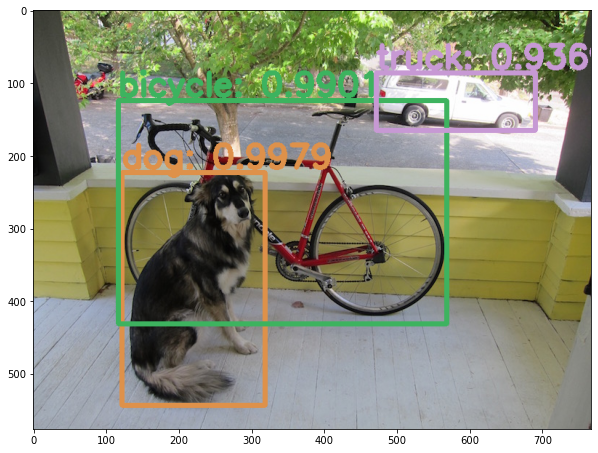

In [37]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))